In [1]:
from lib_plot import plot_R_t
from lib_sim import compute_spin_dynamics_TWA, chain_positions,generate_thermal_distribution_in_cylinder
from lib_exact import compute_spin_dynamics_exact
import numpy as np
import scipy.constants as cst
import qutip as qt

In [26]:
# Define simulation parameters
num_particles=100           # Number of particles in the chain

listNumparticles=[100]       # List of particle numbers to simulate

spacing_factor=1       # Spacing between particles as a fraction of wavelength

t_max_factor=1              # Maximum simulation time as a factor of Gamma_0
num_steps=800              # Number of time steps for the simulation

omega_z=0                   # Detuning (in rad/s)
Omega_Rabi=0                # Rabi frequency (set to 0 for no driving)

num_simulations=8000       # Number of TWA trajectories to average
# listNumparticles=[200]       # List of particle numbers to simulate

time_factor = 10 # compression factor for the time steps to save memory

# Physical constants
atomic_dipole_moment = 2.533e-29 #C·m
dipole_moment=(1/np.sqrt(2))*np.array([1, 1j, 0])*atomic_dipole_moment  # Circular polarization
Gamma_0 = 2*np.pi *6.065 *1e6    # Natural linewidth in rad/s (≈ 38 MHz)
lambda_0 = 780e-9                # Laser wavelength in m (780 nm for Rb)
omega = 2*np.pi*cst.c/lambda_0
T = 50e-6 # T is 50 uK

E_0 = 0.1
# chain of particles
# positions = chain_positions(num_particles, spacing_factor, lambda_0)

# themal distribution inside of cylinder (PHOENIQS SETUP)
positions = generate_thermal_distribution_in_cylinder(num_particles,spacing_factor,lambda_0,E_0)

t_list = np.linspace(0,t_max_factor/Gamma_0,num_steps)

In [27]:
positions

array([[-1.17375982e-07, -2.58148591e-08,  8.49231930e-07],
       [ 7.32851875e-08, -3.13563816e-08, -7.90618150e-07],
       [ 1.46306601e-08, -8.82680145e-08, -1.30399632e-06],
       [ 2.27137743e-09,  1.73385835e-09,  1.51973732e-06],
       [ 4.51201014e-08, -1.81532904e-08, -7.68950947e-07],
       [ 7.78519420e-08, -1.38613286e-07, -1.01654793e-06],
       [ 4.06987708e-08,  8.71514155e-08, -3.55825078e-07],
       [-3.84232623e-08,  9.67911329e-09,  1.51249279e-06],
       [-9.30209557e-09, -2.37040953e-08, -1.50217710e-06],
       [-1.37599599e-08,  5.94960387e-08, -2.70733502e-06],
       [-3.37774316e-08, -1.46831821e-08, -2.44459804e-06],
       [ 9.38326037e-08, -4.51699171e-08,  1.29174364e-06],
       [-6.12276225e-08, -6.79155539e-08,  2.17194573e-06],
       [-1.73120560e-08, -6.56338293e-10, -1.97434204e-06],
       [-1.57983945e-08, -5.61248738e-08,  6.11730906e-08],
       [-1.92863737e-08,  5.00036827e-08,  2.25937882e-06],
       [ 1.73161969e-08,  1.30215581e-08

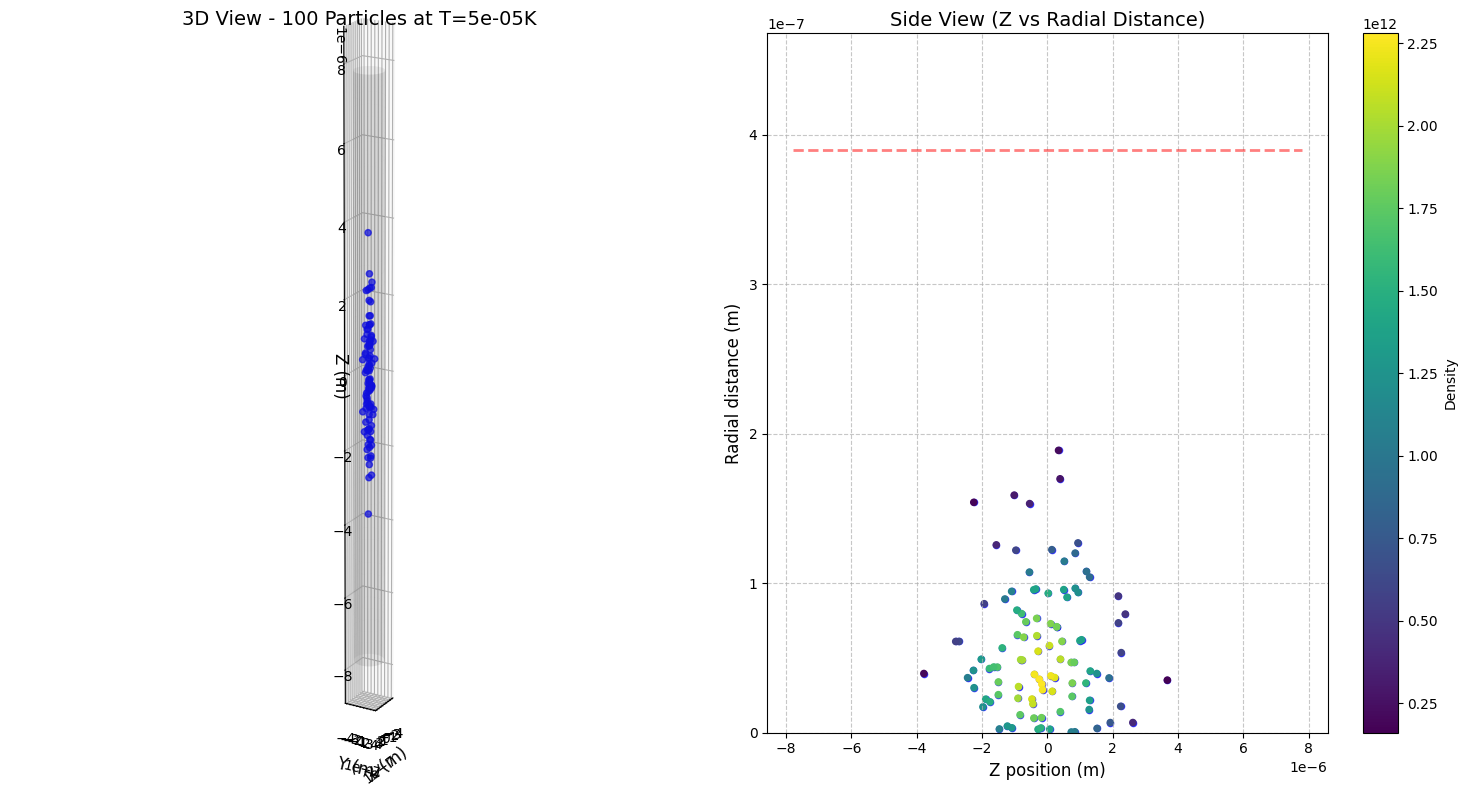

In [44]:
import matplotlib.pyplot as plt
# Create a figure with two subplots: one for 3D view and one for 2D projection
fig = plt.figure(figsize=(15, 8))
N = num_particles

length = 20 * lambda_0 *spacing_factor # cylinder length
radius = 0.5 * lambda_0 *spacing_factor # cylinder radius
# 3D plot (elongated view)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='blue', marker='o', alpha=0.7)
ax1.set_xlabel('X (m)', fontsize=12)
ax1.set_ylabel('Y (m)', fontsize=12)
ax1.set_zlabel('Z (m)', fontsize=12)
ax1.set_title(f'3D View - {N} Particles at T={T}K', fontsize=14)

# Create cylinder wireframe for 3D plot
theta = np.linspace(0, 2*np.pi, 50)
z = np.linspace(-length/2, length/2, 50)
theta_grid, z_grid = np.meshgrid(theta, z)
x_grid = radius * np.cos(theta_grid)
y_grid = radius * np.sin(theta_grid)
ax1.plot_surface(x_grid, y_grid, z_grid, alpha=0.1, color='gray')

# Adjust 3D view to better show the elongated structure
ax1.view_init(elev=20, azim=30)
# Don't force equal aspect ratio to better visualize the elongated structure
ax1.set_box_aspect([radius*2, radius*2, length])

# 2D projection plot (side view)
ax2 = fig.add_subplot(122)
ax2.scatter(positions[:, 2], np.sqrt(positions[:, 0]**2 + positions[:, 1]**2), c='blue', alpha=0.7, s=20)
ax2.set_xlabel('Z position (m)', fontsize=12)
ax2.set_ylabel('Radial distance (m)', fontsize=12)
ax2.set_title('Side View (Z vs Radial Distance)', fontsize=14)

# Add cylinder boundaries to 2D plot
ax2.plot([-length/2, length/2], [radius, radius], 'r--', alpha=0.5, linewidth=2)
ax2.set_xlim(-length/2*1.1, length/2*1.1)
ax2.set_ylim(0, radius*1.2)
ax2.grid(True, linestyle='--', alpha=0.7)

# Add colorbar for density visualization in 2D plot
from scipy.stats import gaussian_kde
xy = np.vstack([positions[:, 2], np.sqrt(positions[:, 0]**2 + positions[:, 1]**2)])
z = gaussian_kde(xy)(xy)
sc = ax2.scatter(positions[:, 2], np.sqrt(positions[:, 0]**2 + positions[:, 1]**2), c=z, s=20, cmap='viridis')
plt.colorbar(sc, ax=ax2, label='Density')

plt.tight_layout()
plt.show()

In [29]:
positions

array([[-1.17375982e-07, -2.58148591e-08,  8.49231930e-07],
       [ 7.32851875e-08, -3.13563816e-08, -7.90618150e-07],
       [ 1.46306601e-08, -8.82680145e-08, -1.30399632e-06],
       [ 2.27137743e-09,  1.73385835e-09,  1.51973732e-06],
       [ 4.51201014e-08, -1.81532904e-08, -7.68950947e-07],
       [ 7.78519420e-08, -1.38613286e-07, -1.01654793e-06],
       [ 4.06987708e-08,  8.71514155e-08, -3.55825078e-07],
       [-3.84232623e-08,  9.67911329e-09,  1.51249279e-06],
       [-9.30209557e-09, -2.37040953e-08, -1.50217710e-06],
       [-1.37599599e-08,  5.94960387e-08, -2.70733502e-06],
       [-3.37774316e-08, -1.46831821e-08, -2.44459804e-06],
       [ 9.38326037e-08, -4.51699171e-08,  1.29174364e-06],
       [-6.12276225e-08, -6.79155539e-08,  2.17194573e-06],
       [-1.73120560e-08, -6.56338293e-10, -1.97434204e-06],
       [-1.57983945e-08, -5.61248738e-08,  6.11730906e-08],
       [-1.92863737e-08,  5.00036827e-08,  2.25937882e-06],
       [ 1.73161969e-08,  1.30215581e-08

In [30]:
# simulate the dynamics of the dissipative spins using TWA 
magnetizations_list, Gammas, J_matrices = compute_spin_dynamics_TWA(num_particles,
                                            Gamma_0,
                                            t_max_factor,
                                            num_steps,
                                            time_factor,
                                            omega_z,
                                            Omega_Rabi,
                                            num_simulations,
                                            dipole_moment ,
                                            listNumparticles,
                                            positions)

# psi0=qt.tensor([qt.basis(2,0) for n in range(num_particles)])   # spins all up initially

# simulate the dynamics of the dissipative spins using exact method, will not work for N larger than 10 
# result_exact = compute_spin_dynamics_exact(num_particles, omega_z,Omega_Rabi, positions, dipole_moment, omega, t_list,Gamma_0, psi0)


Simulating spin dynamics...
J matrix and Gamma matrix are computed
Gamma matrix [[ 38107518.88804419+0.j   3074266.87479255+0.j  -3231508.13948849+0.j
  ...   1836607.35741656+0.j  -3028222.5206548 +0.j
   -2228428.0398319 +0.j]
 [  3074266.87479255+0.j  38107518.88804419+0.j -12591711.09450916+0.j
  ...   6010106.08357262+0.j  -9873150.4724419 +0.j
  -10391504.8134182 +0.j]
 [ -3231508.13948849+0.j -12591711.09450916+0.j  38107518.88804419+0.j
  ...  -5007963.44097125+0.j  32362181.72752948+0.j
   28169953.34460703+0.j]
 ...
 [  1836607.35741656+0.j   6010106.08357262+0.j  -5007963.44097125+0.j
  ...  38107518.88804419+0.j  -4916681.1886948 +0.j
   -3282901.87877604+0.j]
 [ -3028222.5206548 +0.j  -9873150.4724419 +0.j  32362181.72752948+0.j
  ...  -4916681.1886948 +0.j  38107518.88804419+0.j
   25790278.12910337+0.j]
 [ -2228428.0398319 +0.j -10391504.8134182 +0.j  28169953.34460703+0.j
  ...  -3282901.87877604+0.j  25790278.12910337+0.j
   38107518.88804419+0.j]]
J matrix [[       0.

Running simulations:   0%|          | 2/8000 [00:01<1:21:23,  1.64it/s]/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_sim.py:62: RuntimeWarning: overflow encountered in multiply
  derivatives += s_z * j_sum
/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_sim.py:63: RuntimeWarning: overflow encountered in multiply
  derivatives += 0.5 * s_z * gamma_sum
/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_sim.py:63: RuntimeWarning: invalid value encountered in add
  derivatives += 0.5 * s_z * gamma_sum
/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_sim.py:109: RuntimeWarning: overflow encountered in multiply
  derivatives -= s_z * j_sum
/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_sim.py:110: RuntimeWarning: overflow encountered in multiply
  derivatives += 0.5 * s_z * gamma_sum
/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_sim.py:110: RuntimeWarning: invalid value encountered in add
  derivatives += 0.5 * s_

All simulations complete!


In [ ]:
result_exact = compute_spin_dynamics_exact(num_particles, omega_z,Omega_Rabi, positions, dipole_moment, omega, tlist,Gamma_0, psi0)

/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_plot.py:45: RuntimeWarning: invalid value encountered in multiply
  s_plus = 0.5*(magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
/Users/martinpoitrinsl/Documents/GitHub/Truncated-Wigner/lib_plot.py:46: RuntimeWarning: invalid value encountered in multiply
  s_minus = 0.5*(magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms


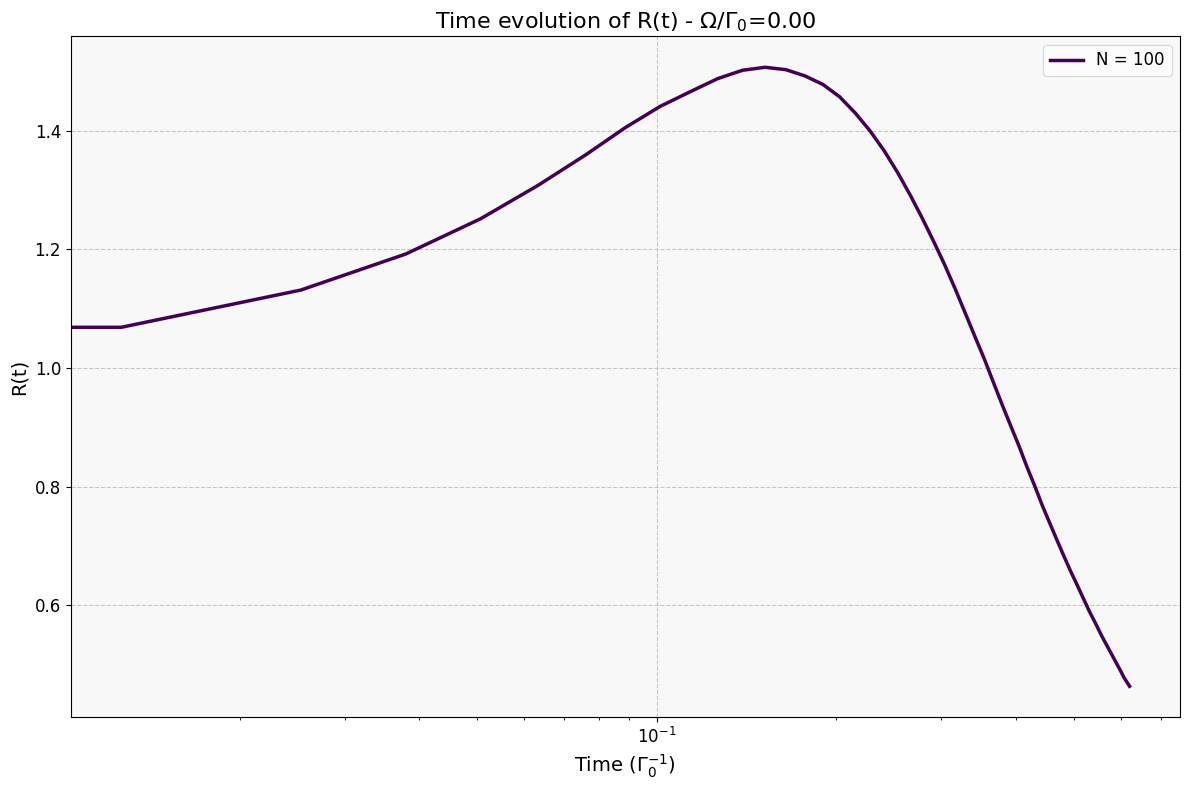

([array([ 0.50015446-8.12417091e-19j,  0.56881375-6.16520514e-18j,
          0.63156814-1.03771725e-18j,  0.69241568-1.59218475e-17j,
          0.75156403+1.69037171e-17j,  0.80821563-1.52707683e-17j,
          0.85917243+3.19009748e-17j,  0.9054659 -3.43907324e-17j,
          0.94098167-3.58227249e-17j,  0.96607961-1.66989421e-17j,
          0.98800447-1.29604870e-17j,  1.00201466+6.33131627e-18j,
          1.00702964-4.18218190e-17j,  1.00304156+6.52988590e-18j,
          0.99246941-6.16405955e-17j,  0.97811194-2.18121101e-17j,
          0.95736266+7.13323209e-18j,  0.92986727-8.85926041e-19j,
          0.89970939-1.15170385e-17j,  0.86651476+2.92355593e-17j,
          0.83027395-4.35325727e-18j,  0.79220236-9.27167425e-18j,
          0.75322271-1.41366302e-17j,  0.71366002-2.29118804e-19j,
          0.67425908-8.22536505e-18j,  0.63345789+6.56043508e-18j,
          0.59215682+8.36283633e-18j,  0.55233004-2.06206923e-19j,
          0.5143386 -3.53606687e-18j,  0.47484105-6.03346183e-

In [32]:
t_list = np.linspace(0,t_max_factor/Gamma_0,num_steps//time_factor)
plot_R_t([magnetizations_list[0]], t_list, Gammas, J_matrices, listNumparticles, Gamma_0, num_simulations, Omega_Rabi=0, spacing=None, lambda_0=None, plot_max=False)


In [47]:
positions

array([[-1.17375982e-07, -2.58148591e-08,  8.49231930e-07],
       [ 7.32851875e-08, -3.13563816e-08, -7.90618150e-07],
       [ 1.46306601e-08, -8.82680145e-08, -1.30399632e-06],
       [ 2.27137743e-09,  1.73385835e-09,  1.51973732e-06],
       [ 4.51201014e-08, -1.81532904e-08, -7.68950947e-07],
       [ 7.78519420e-08, -1.38613286e-07, -1.01654793e-06],
       [ 4.06987708e-08,  8.71514155e-08, -3.55825078e-07],
       [-3.84232623e-08,  9.67911329e-09,  1.51249279e-06],
       [-9.30209557e-09, -2.37040953e-08, -1.50217710e-06],
       [-1.37599599e-08,  5.94960387e-08, -2.70733502e-06],
       [-3.37774316e-08, -1.46831821e-08, -2.44459804e-06],
       [ 9.38326037e-08, -4.51699171e-08,  1.29174364e-06],
       [-6.12276225e-08, -6.79155539e-08,  2.17194573e-06],
       [-1.73120560e-08, -6.56338293e-10, -1.97434204e-06],
       [-1.57983945e-08, -5.61248738e-08,  6.11730906e-08],
       [-1.92863737e-08,  5.00036827e-08,  2.25937882e-06],
       [ 1.73161969e-08,  1.30215581e-08

In [43]:
positions

array([[-1.17375982e-07, -2.58148591e-08,  8.49231930e-07],
       [ 7.32851875e-08, -3.13563816e-08, -7.90618150e-07],
       [ 1.46306601e-08, -8.82680145e-08, -1.30399632e-06],
       [ 2.27137743e-09,  1.73385835e-09,  1.51973732e-06],
       [ 4.51201014e-08, -1.81532904e-08, -7.68950947e-07],
       [ 7.78519420e-08, -1.38613286e-07, -1.01654793e-06],
       [ 4.06987708e-08,  8.71514155e-08, -3.55825078e-07],
       [-3.84232623e-08,  9.67911329e-09,  1.51249279e-06],
       [-9.30209557e-09, -2.37040953e-08, -1.50217710e-06],
       [-1.37599599e-08,  5.94960387e-08, -2.70733502e-06],
       [-3.37774316e-08, -1.46831821e-08, -2.44459804e-06],
       [ 9.38326037e-08, -4.51699171e-08,  1.29174364e-06],
       [-6.12276225e-08, -6.79155539e-08,  2.17194573e-06],
       [-1.73120560e-08, -6.56338293e-10, -1.97434204e-06],
       [-1.57983945e-08, -5.61248738e-08,  6.11730906e-08],
       [-1.92863737e-08,  5.00036827e-08,  2.25937882e-06],
       [ 1.73161969e-08,  1.30215581e-08

In [33]:
np.shape(magnetizations_list)

(1, 8000, 80, 100, 3)

In [ ]:
def OutputPower(k_vector, magnetizations_list,positions,t_list):
    num_particles = np.shape(magnetizations_list)[2]
    P_k = np.linspace()
    s_plus = 0.5*(magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_minus = 0.5*(magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_z = magnetizations[:,:,:,2]  # z component
    for t in range(len(t_list))
        for i in range(num_particles):
            for j in range(num_particles):
                P_k[t] += np.exp(j*(positions[i]-positions[j]))* (np.dot(s_plus[:,t,i], s_minus[:,t,j]))/num_simulations
                if i == j:     # Diagonal terms: contribution from individual atoms      # Calculate <s_z> averaged over all simulations
                    P_k[t] +=np.exp(j*(positions[i]-positions[j])) * (np.sum(s_z[:,t,i]))/(2*num_simulations)
    return

/var/folders/4j/70sfph811y536y9vdyrg9k7m0000gn/T/ipykernel_46178/511750814.py:30: RuntimeWarning: invalid value encountered in multiply
  s_plus = 0.5*(magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
/var/folders/4j/70sfph811y536y9vdyrg9k7m0000gn/T/ipykernel_46178/511750814.py:31: RuntimeWarning: invalid value encountered in multiply
  s_minus = 0.5*(magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms


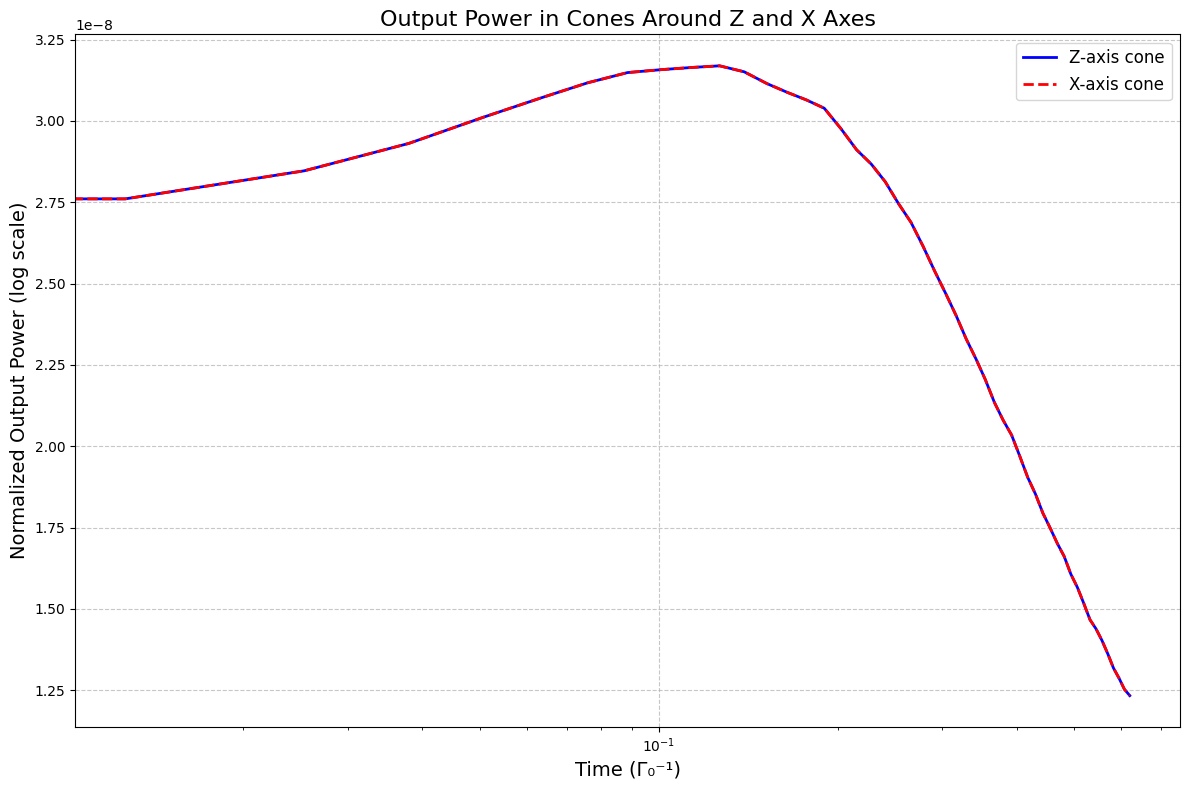

In [ ]:
def OutputPower(k_vector, magnetizations, positions, t_list, num_simulations):
    """
    Calculate the output power in the direction of k_vector for each time step.
    
    Parameters:
    -----------
    k_vector : numpy.ndarray
        The wave vector direction (normalized)
    magnetizations : numpy.ndarray
        Array of magnetizations with shape (num_simulations, num_time_steps, num_particles, 3)
    positions : numpy.ndarray
        Array of particle positions with shape (num_particles, 3)
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
        
    Returns:
    --------
    P_k : numpy.ndarray
        Output power for each time step
    """
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    # Initialize output power array
    P_k = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate spin operators
    s_plus = 0.5*(magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_minus = 0.5*(magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])  # For all simulations, all time steps, all atoms
    s_z = magnetizations[:,:,:,2]  # z component
    
    # Calculate average spin operators over all simulations
    avg_s_plus = np.mean(s_plus, axis=0)   # shape: (time_steps, num_particles)
    avg_s_minus = np.mean(s_minus, axis=0) # shape: (time_steps, num_particles)
    avg_s_z = np.mean(s_z, axis=0)         # shape: (time_steps, num_particles)
    
    # Calculate all phases first to avoid redundant calculations
    phases = np.zeros((num_particles, num_particles))
    for i in range(num_particles):
        for j in range(num_particles):
            phases[i, j] = np.dot(k_vector, positions[i] - positions[j])
    
    # Calculate output power for each time step
    for t in range(num_time_steps):
        for i in range(num_particles):
            for j in range(num_particles):
                # Use pre-computed phase
                phase = phases[i, j]

                # Add coherent contribution
                P_k[t] += np.exp(1j*(phase)) * (np.dot(s_plus[:,t,i], s_minus[:,t,j]))/num_simulations
                
                if i == j:     # Diagonal terms: contribution from individual atoms      # Calculate <s_z> averaged over all simulations
                    P_k[t] += np.exp(1j*(phase)) * (np.sum(s_z[:,t,i]))/(2*num_simulations)
    
    return P_k,phases

# Generate k-vectors in a cone around a specified axis
def generate_k_vectors_in_cone(axis, cone_angle, num_vectors):
    """
    Generate normalized k-vectors within a cone around a specified axis.
    
    Parameters:
    -----------
    axis : numpy.ndarray
        The central axis of the cone (will be normalized)
    cone_angle : float
        The half-angle of the cone in radians
    num_vectors : int
        Number of k-vectors to generate
        
    Returns:
    --------
    k_vectors : numpy.ndarray
        Array of normalized k-vectors within the cone
    """
    # Normalize the axis
    axis = axis / np.linalg.norm(axis)
    
    k_vectors = []
    
    for _ in range(num_vectors):
        if axis[0] == 0 and axis[1] == 0 and axis[2] == 1:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to z-axis)
            x = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            z = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
        if axis[0] == 1 and axis[1] == 0 and axis[2] == 0:
            # Generate random direction within the cone
            # First, random point on unit sphere
            phi = np.random.uniform(0, 2*np.pi)
            cos_theta = np.random.uniform(np.cos(cone_angle), 1)  # cos(theta) is uniform in [cos(cone_angle), 1]
            sin_theta = np.sqrt(1 - cos_theta**2)
            
            # Convert to Cartesian coordinates (relative to x-axis)
            z = sin_theta * np.cos(phi)
            y = sin_theta * np.sin(phi)
            x = cos_theta
            
            # Rotate to align with the specified axis
            k_vector = np.array([x, y, z])
            
            # Ensure it's normalized
            k_vector = k_vector / np.linalg.norm(k_vector)
            
            k_vectors.append(k_vector)
    
    return np.array(k_vectors)

# Calculate output power for k-vectors in cones around z and x axes
def calculate_output_power_in_cones(magnetizations, positions, t_list, num_simulations, num_vectors_per_cone=10, cone_angle=np.pi/6):
    """
    Calculate output power for k-vectors in cones around z and x axes.
    
    Parameters:
    -----------
    magnetizations : numpy.ndarray
        Array of magnetizations
    positions : numpy.ndarray
        Array of particle positions
    t_list : numpy.ndarray
        Array of time points
    num_simulations : int
        Number of simulations averaged
    num_vectors_per_cone : int
        Number of k-vectors per cone
    cone_angle : float
        Half-angle of the cone in radians
        
    Returns:
    --------
    z_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around z-axis
    x_cone_power : numpy.ndarray
        Summed output power for k-vectors in cone around x-axis
    """
    # Generate k-vectors in cones around z and x axes
    z_axis = np.array([0, 0, 1])
    x_axis = np.array([1, 0, 0])
    
    z_cone_vectors = generate_k_vectors_in_cone(z_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    x_cone_vectors = generate_k_vectors_in_cone(x_axis, cone_angle, num_vectors_per_cone)*2*np.pi/lambda_0
    
    # Calculate power for each k-vector and sum within each cone
    num_time_steps = len(t_list)
    num_particles = np.shape(magnetizations)[2]
    
    z_cone_power = np.zeros(num_time_steps, dtype=complex)
    x_cone_power = np.zeros(num_time_steps, dtype=complex)
    
    # Calculate and sum powers for z-cone
    for k_vector in z_cone_vectors:
        power,phases_z = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        z_cone_power += power
    
    # Calculate and sum powers for x-cone
    for k_vector in x_cone_vectors:
        power,phases_x = OutputPower(k_vector, magnetizations, positions, t_list, num_simulations)
        x_cone_power += power
    
    # Normalize by number of k-vectors and num_particles*Gamma_0
    z_cone_power = z_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    x_cone_power = x_cone_power / (num_vectors_per_cone * num_particles * Gamma_0)
    
    return z_cone_power, x_cone_power,phases_z,phases_x

# Example usage:
if magnetizations_list is not None and len(magnetizations_list) > 0:
    # Use the first magnetization array from the list
    magnetizations = magnetizations_list[0]
    
    # Calculate output power for cones around z and x axes
    z_cone_power, x_cone_power,phases_z,phases_x = calculate_output_power_in_cones(
        magnetizations, 
        positions, 
        t_list, 
        num_simulations,
        num_vectors_per_cone=10,
        cone_angle=0.1  # 30 degrees cone
    )
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    
    # Plot absolute values of powers
    plt.plot(t_list * Gamma_0, np.abs(z_cone_power), 'b-', linewidth=2, label='Z-axis cone')
    plt.plot(t_list * Gamma_0, np.abs(x_cone_power), 'r--', linewidth=2, label='X-axis cone')
    plt.xscale('log')
    plt.title('Output Power in Cones Around Z and X Axes', fontsize=16)
    plt.xlabel('Time (Γ₀⁻¹)', fontsize=14)
    plt.ylabel('Normalized Output Power (log scale)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [65]:
phases_z

array([[ 0.00000000e+00,  1.62839336e-06,  2.13638100e-06, ...,
         7.73537027e-07,  2.06644754e-06,  2.22860826e-06],
       [-1.62839336e-06,  0.00000000e+00,  5.07987637e-07, ...,
        -8.54856334e-07,  4.38054175e-07,  6.00214904e-07],
       [-2.13638100e-06, -5.07987637e-07,  0.00000000e+00, ...,
        -1.36284397e-06, -6.99334619e-08,  9.22272675e-08],
       ...,
       [-7.73537027e-07,  8.54856334e-07,  1.36284397e-06, ...,
         0.00000000e+00,  1.29291051e-06,  1.45507124e-06],
       [-2.06644754e-06, -4.38054175e-07,  6.99334619e-08, ...,
        -1.29291051e-06,  0.00000000e+00,  1.62160729e-07],
       [-2.22860826e-06, -6.00214904e-07, -9.22272675e-08, ...,
        -1.45507124e-06, -1.62160729e-07,  0.00000000e+00]])

In [62]:
x_cone_power

array([2.65051695e-08-1.86810154e-26j, 2.76038223e-08+1.76368587e-25j,
       2.84660664e-08+5.44597405e-26j, 2.93085153e-08+9.14519065e-26j,
       3.01099485e-08-3.04752912e-25j, 3.07039170e-08-3.44913112e-26j,
       3.11725413e-08-2.66644039e-25j, 3.14858772e-08+7.02060212e-26j,
       3.15779978e-08-1.82451440e-25j, 3.16442942e-08+7.49516706e-26j,
       3.16936111e-08+4.08353453e-25j, 3.15099977e-08+1.33743096e-25j,
       3.11518968e-08+1.55252155e-25j, 3.08773880e-08-8.31228366e-26j,
       3.06448799e-08+1.81950700e-25j, 3.03906979e-08-5.57187032e-26j,
       2.97636848e-08+5.02105634e-26j, 2.91150633e-08-4.21987237e-26j,
       2.86723921e-08+1.43848940e-26j, 2.81305648e-08+1.16490328e-25j,
       2.74589739e-08-5.35791778e-26j, 2.68779761e-08+1.90281192e-26j,
       2.61463481e-08+8.91772382e-26j, 2.53906095e-08+6.90110736e-26j,
       2.47040049e-08+2.32115742e-25j, 2.40201187e-08-2.35347790e-26j,
       2.32974925e-08-8.90406728e-26j, 2.26861609e-08-1.48401121e-26j,
      

In [63]:
z_cone_power

array([2.65051693e-08+2.04927837e-25j, 2.76038219e-08-5.68112268e-26j,
       2.84660659e-08+1.10414588e-25j, 2.93085148e-08-3.65690976e-25j,
       3.01099482e-08+2.17082162e-26j, 3.07039165e-08-2.68866073e-25j,
       3.11725409e-08+3.21685605e-25j, 3.14858767e-08-1.41971165e-26j,
       3.15779972e-08-1.75941820e-25j, 3.16442937e-08+1.72527684e-26j,
       3.16936107e-08+8.29179885e-26j, 3.15099972e-08-3.41755036e-25j,
       3.11518962e-08-7.46785397e-26j, 3.08773873e-08+1.49721254e-25j,
       3.06448793e-08-6.64163300e-26j, 3.03906973e-08-6.71902009e-26j,
       2.97636843e-08+1.77170909e-25j, 2.91150628e-08+5.74940540e-26j,
       2.86723916e-08+5.62649650e-26j, 2.81305642e-08+4.02868075e-26j,
       2.74589734e-08+2.48093899e-26j, 2.68779758e-08+2.28064300e-26j,
       2.61463477e-08-4.87993871e-26j, 2.53906090e-08+7.74326096e-26j,
       2.47040044e-08+9.05884145e-27j, 2.40201183e-08+2.54922172e-27j,
       2.32974920e-08-4.93911707e-26j, 2.26861603e-08+4.90725180e-26j,
      

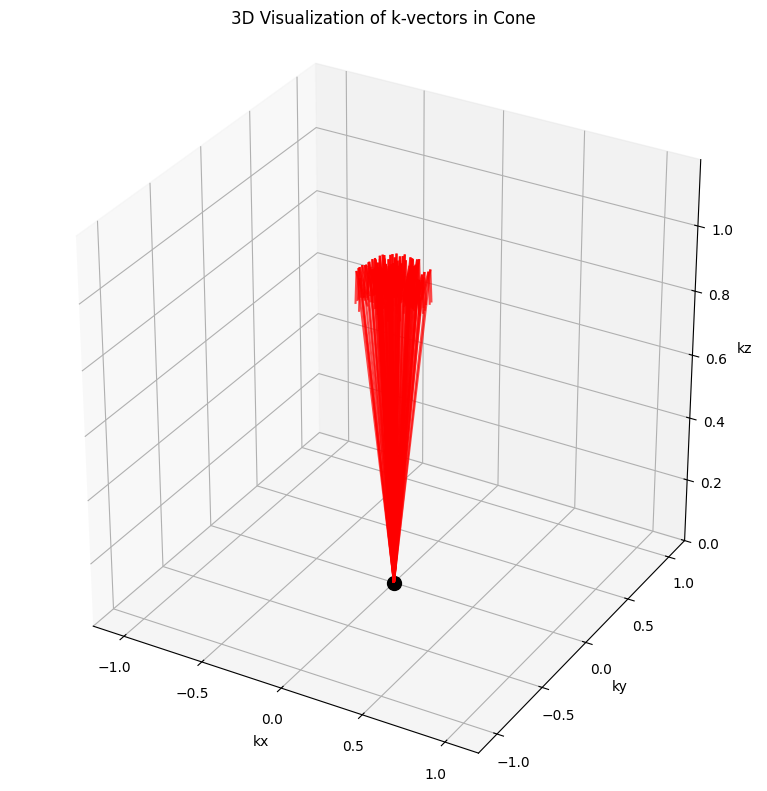

In [60]:
# Create a 3D plot of the k-vectors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
k_vectors = generate_k_vectors_in_cone([0,0,1], 0.2, 100)
# Create a new figure with 3D projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z components from k_vectors
x = k_vectors[:, 0]
y = k_vectors[:, 1]
z = k_vectors[:, 2]

# Plot the k-vectors as arrows
for i in range(len(k_vectors)):
    ax.quiver(0, 0, 0, x[i], y[i], z[i], color='r', alpha=0.7, 
              arrow_length_ratio=0.1, linewidth=1.5)

# Set labels and title
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('kz')
ax.set_title('3D Visualization of k-vectors in Cone')

# Set equal aspect ratio for all axes
ax.set_box_aspect([1, 1, 1])

# Add a point at the origin
ax.scatter(0, 0, 0, c='k', marker='o', s=100)

# Set axis limits to make arrows more visible
max_val = np.max(np.abs(k_vectors)) * 1.2
ax.set_xlim([-max_val, max_val])
ax.set_ylim([-max_val, max_val])
ax.set_zlim([0, max_val])

plt.tight_layout()
plt.show()


In [39]:
positions

array([[-1.17375982e-07, -2.58148591e-08,  8.49231930e-07],
       [ 7.32851875e-08, -3.13563816e-08, -7.90618150e-07],
       [ 1.46306601e-08, -8.82680145e-08, -1.30399632e-06],
       [ 2.27137743e-09,  1.73385835e-09,  1.51973732e-06],
       [ 4.51201014e-08, -1.81532904e-08, -7.68950947e-07],
       [ 7.78519420e-08, -1.38613286e-07, -1.01654793e-06],
       [ 4.06987708e-08,  8.71514155e-08, -3.55825078e-07],
       [-3.84232623e-08,  9.67911329e-09,  1.51249279e-06],
       [-9.30209557e-09, -2.37040953e-08, -1.50217710e-06],
       [-1.37599599e-08,  5.94960387e-08, -2.70733502e-06],
       [-3.37774316e-08, -1.46831821e-08, -2.44459804e-06],
       [ 9.38326037e-08, -4.51699171e-08,  1.29174364e-06],
       [-6.12276225e-08, -6.79155539e-08,  2.17194573e-06],
       [-1.73120560e-08, -6.56338293e-10, -1.97434204e-06],
       [-1.57983945e-08, -5.61248738e-08,  6.11730906e-08],
       [-1.92863737e-08,  5.00036827e-08,  2.25937882e-06],
       [ 1.73161969e-08,  1.30215581e-08

In [38]:
k_vectors

array([[ 3.56276196e-01, -9.34380689e-01,  0.00000000e+00],
       [ 6.93820601e-01, -7.20147883e-01,  0.00000000e+00],
       [ 3.99765002e-01,  9.16617665e-01,  0.00000000e+00],
       [-9.48793668e-01, -3.15896464e-01,  0.00000000e+00],
       [ 5.74814934e-01, -8.18283442e-01,  0.00000000e+00],
       [-2.50849138e-01, -4.57490169e-02,  9.66944537e-01],
       [ 4.64722713e-02,  5.21423427e-04,  9.98919444e-01],
       [-1.71825954e-01,  2.51483646e-01,  9.52487174e-01],
       [ 7.75004907e-02,  2.47341258e-01,  9.65823988e-01],
       [-4.12282341e-03, -2.29430400e-02,  9.99728273e-01]])

<>:101: SyntaxWarning: invalid escape sequence '\O'
<>:101: SyntaxWarning: invalid escape sequence '\l'
<>:102: SyntaxWarning: invalid escape sequence '\G'
<>:101: SyntaxWarning: invalid escape sequence '\O'
<>:101: SyntaxWarning: invalid escape sequence '\l'
<>:102: SyntaxWarning: invalid escape sequence '\G'
/var/folders/4j/70sfph811y536y9vdyrg9k7m0000gn/T/ipykernel_43555/3345327113.py:101: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f'Time evolution of R(t) - $\Omega/\Gamma_0$={Omega_Rabi/Gamma_0:.2f}, $a/\lambda_0$={spacing/lambda_0:.2f}', fontsize=16)
/var/folders/4j/70sfph811y536y9vdyrg9k7m0000gn/T/ipykernel_43555/3345327113.py:101: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'Time evolution of R(t) - $\Omega/\Gamma_0$={Omega_Rabi/Gamma_0:.2f}, $a/\lambda_0$={spacing/lambda_0:.2f}', fontsize=16)
/var/folders/4j/70sfph811y536y9vdyrg9k7m0000gn/T/ipykernel_43555/3345327113.py:102: SyntaxWarning: invalid escape sequence '\G'
  plt.xlabel('Time ($\Gamma_0^{-1}

NameError: name 'spacing' is not defined

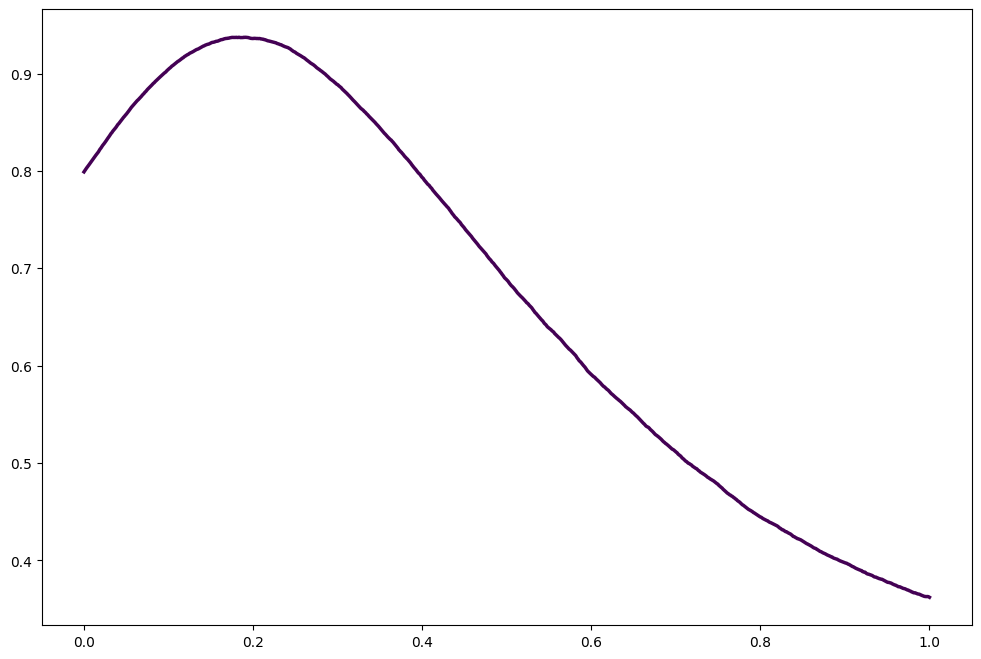

In [38]:

c = 2.99792458e8     

Gamma_0 = 2*np.pi *6.065 *1e6
               # Speed of light in m/s (in units where ħ = 1)
atomic_dipole_moment = 2.533e-29 #C·m

p_vector =(1/np.sqrt(2))*np.array([1, 1j, 0])*atomic_dipole_moment  # Dipole moment direction (complex vector with imaginary y-component)

lambda_0 = 780e-9          # laser wavelength in m
             # speed of light m/s (more precise value)
omega = 2*np.pi*c/lambda_0 # laser frequency in rad/s 

Omega_R = 2*np.pi *6.065 *1e6 * 0# Rabi frequency

omega_z = 0.0  # Detuning
    # Dipole moment vector (along z-axis)
    
prefactor = 0.5


    # Time points

tlist = np.linspace(0, 1/Gamma_0, 1000)


# Process magnetization_list to calculate R(t) for each number of particles
R_t_list = []
R_max_list = []  # List to store maximum R(t) values
labels = []
colors = plt.cm.viridis(np.linspace(0, 1, len(magnetizations_list)))  # Create a color gradient

for idx in range(len(magnetizations_list)):
    magnetizations = magnetizations_list[idx]
    Gamma = Gammas[idx]
    J_matrix = J_matrices[idx]
    num_particles_current = listNumparticles[idx]

    
    # Extract the components we need
    # s⁺ = s_x + i*s_y and s⁻ = s_x - i*s_y
    s_plus =  0.5*(magnetizations[:,:,:,0] + 1j * magnetizations[:,:,:,1])  # For all atoms, all time steps
    s_minus = 0.5*(magnetizations[:,:,:,0] - 1j * magnetizations[:,:,:,1])  # For all atoms, all time steps
    s_z = magnetizations[:,:,:,2]  # z component
    s_x = magnetizations[:,:,:,0]  # x component
    s_y = magnetizations[:,:,:,1]  # y component
    # Initialize R(t)
    R_t = np.zeros(len(t_list), dtype=complex)
    # Calculate average s_plus and s_minus over all simulations first
    avg_s_plus = np.mean(s_plus, axis=0)  # shape: (time_steps, num_particles)
    avg_s_minus = np.mean(s_minus, axis=0)  # shape: (time_steps, num_particles)
    avg_s_z = np.mean(s_z, axis=0)  # shape: (time_steps, num_particles)

    # Calculate R(t) for each time step using vectorized operations
    R_inch_t = np.zeros(len(t_list), dtype=complex)
    for t in range(len(t_list)):
        # Off-diagonal terms (i != j)
        for i in range(num_particles_current):
            for j in range(num_particles_current):

                if i != j:

                    R_t[t] += Gamma[i,j] * (np.dot(s_plus[:,t, i],s_minus[:,  t, j]))/num_simulations
                else : 
                    
                    R_t[t] += Gamma_0 * (np.sum(s_z[:,t,i]))/(2*num_simulations)
    # Normalize by N*Γ0
    # R_t /= num_particles_current * Gamma_0 
    R_t/= Gamma_0*num_particles_current
    # Store the result
    R_t_list.append(R_t)
    
    # Calculate and store the maximum value of R(t)
    R_max = np.max(np.real(R_t))
    
    R_max_list.append(R_max)
    
    labels.append(f'N = {num_particles_current}')

# Plot R(t) for all particle numbers on the same graph
plt.figure(figsize=(12, 8))


for idx, R_t in enumerate(R_t_list):
    plt.plot(t_list*Gamma_0, np.real(R_t)+0.5, label='TWA'+str(labels[idx]), color=colors[idx], linewidth=2.5 )
    N = listNumparticles[idx]
    # psi0=qt.tensor([qt.basis(2,0) for n in range(N)])   # Run simulation

    # positions = np.array([[prefactor*i*lambda_0, 0, 0] for i in np.arange(-N/2,N/2)], dtype=np.float64)
    # result = simulate_correlated_system(N, omega_z, Omega_R, positions, p_vector, omega, tlist, Gamma_0, psi0)
    # log_indices = np.unique(np.logspace(0, np.log10(len(tlist)-1), 30).astype(int))
    # plt.plot(tlist[log_indices]*Gamma_0, result.expect[0][log_indices], 'o', 
    #      markerfacecolor=colors[idx], markeredgecolor=colors[idx], markeredgewidth=1.5, 
    #      markersize=8, label='exact solution for N ='+str(N))


# Number of atoms


# Plot points with logarithmic spacing for better visualization on log scale

plt.title(f'Time evolution of R(t) - $\Omega/\Gamma_0$={Omega_Rabi/Gamma_0:.2f}, $a/\lambda_0$={spacing/lambda_0:.2f}', fontsize=16)
plt.xlabel('Time ($\Gamma_0^{-1}$)', fontsize=14)
plt.ylabel('R(t)', fontsize=14)

# plt.ylim(0,1)

plt.legend(fontsize=12, framealpha=0.7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xscale('log')

# Add a light gray background to highlight the plot area
plt.gca().set_facecolor('#f8f8f8')

# Add a tight layout to make sure everything fits
plt.tight_layout()
plt.show()



In [17]:
avg_magz = np.mean(magnetizations_list,axis = 1)[:,:,:,2]

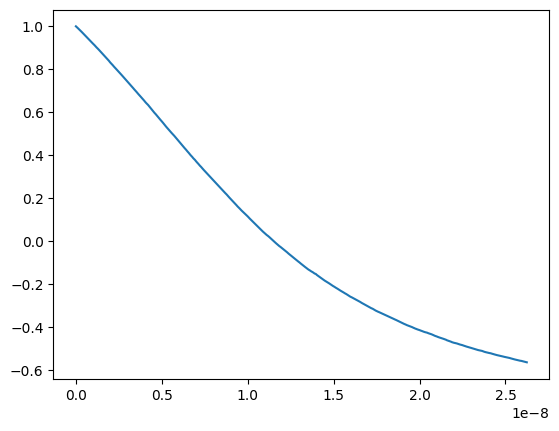

In [23]:
plt.plot(t_list,np.mean(avg_magz[0,:,:],axis = 1))

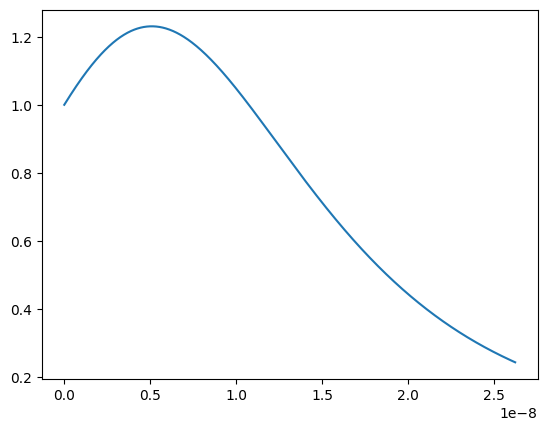

In [7]:
import matplotlib.pyplot as plt
plt.plot(t_list, result_exact.expect[0])

In [8]:
J_matrices

[array([[ 0.00000000e+00+0.j, -1.34487588e+65+0.j, -2.23603767e+64+0.j,
         -1.28282632e+63+0.j,  6.23224716e+63-0.j,  7.80827619e+63-0.j,
          6.03739476e+63-0.j,  2.74089964e+63-0.j, -5.85098835e+62+0.j,
         -2.87682573e+63+0.j],
        [-1.34487588e+65+0.j,  0.00000000e+00+0.j, -1.34487588e+65+0.j,
         -2.23603767e+64+0.j, -1.28282632e+63+0.j,  6.23224716e+63-0.j,
          7.80827619e+63-0.j,  6.03739476e+63-0.j,  2.74089964e+63-0.j,
         -5.85098835e+62+0.j],
        [-2.23603767e+64+0.j, -1.34487588e+65+0.j,  0.00000000e+00+0.j,
         -1.34487588e+65+0.j, -2.23603767e+64+0.j, -1.28282632e+63+0.j,
          6.23224716e+63-0.j,  7.80827619e+63-0.j,  6.03739476e+63-0.j,
          2.74089964e+63-0.j],
        [-1.28282632e+63+0.j, -2.23603767e+64+0.j, -1.34487588e+65+0.j,
          0.00000000e+00+0.j, -1.34487588e+65+0.j, -2.23603767e+64+0.j,
         -1.28282632e+63+0.j,  6.23224716e+63-0.j,  7.80827619e+63-0.j,
          6.03739476e+63-0.j],
        [ 6.

[array([[[[ 1.00000000e+000,  1.00000000e+000,  1.00000000e+000],
          [ 1.00000000e+000, -1.00000000e+000,  1.00000000e+000],
          [ 1.00000000e+000, -1.00000000e+000,  1.00000000e+000],
          ...,
          [-1.00000000e+000, -1.00000000e+000,  1.00000000e+000],
          [-1.00000000e+000,  1.00000000e+000,  1.00000000e+000],
          [ 1.00000000e+000,  1.00000000e+000,  1.00000000e+000]],
 
         [[ 6.21646278e+163, -4.12584785e+163,  2.51183423e+163],
          [-5.45440452e+163,  6.68883274e+163, -6.92770673e+163],
          [-5.32232696e+163,  6.07231931e+163, -6.18705443e+163],
          ...,
          [-5.23418693e+162, -1.27539546e+163,  1.49852921e+161],
          [-2.11966445e+161,  7.05780689e+162,  8.13450345e+162],
          [-1.19241027e+163, -5.46578272e+162, -8.83671954e+162]],
 
         [[             nan,              nan,              nan],
          [             nan,              nan,              nan],
          [             nan,            